In [55]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys

print(tf.__version__)

1.14.0


In [56]:

NUM_WORDS = 10000

print(NUM_WORDS)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
print("222")

10000
222


import sys
a=np.zeros((25000, 10000), dtype=np.int8)

a.shape
help(a)
a.data
print("size: 0x%x" % sys.getsizeof(a))
print("size: %d " % sys.getsizeof(a))

In [57]:
NUM_WORDS = 10000



print(NUM_WORDS)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
print("111")
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension), dtype=np.int8)
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


print("2")
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
print("train_data size %d" % sys.getsizeof(train_data))
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
print("test_data size %d" % sys.getsizeof(test_data))


10000
111
2
train_data size 250000112
test_data size 250000112


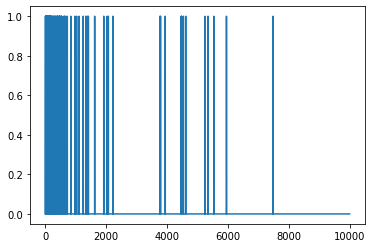

In [58]:
plt.plot(train_data[0])


In [59]:

baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_34 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [60]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4850 - acc: 0.7985 - binary_crossentropy: 0.4850 - val_loss: 0.3402 - val_acc: 0.8777 - val_binary_crossentropy: 0.3402
Epoch 2/20
25000/25000 - 1s - loss: 0.2524 - acc: 0.9118 - binary_crossentropy: 0.2524 - val_loss: 0.2861 - val_acc: 0.8876 - val_binary_crossentropy: 0.2861
Epoch 3/20
25000/25000 - 1s - loss: 0.1842 - acc: 0.9352 - binary_crossentropy: 0.1842 - val_loss: 0.2905 - val_acc: 0.8832 - val_binary_crossentropy: 0.2905
Epoch 4/20
25000/25000 - 1s - loss: 0.1489 - acc: 0.9494 - binary_crossentropy: 0.1489 - val_loss: 0.3211 - val_acc: 0.8737 - val_binary_crossentropy: 0.3211
Epoch 5/20
25000/25000 - 1s - loss: 0.1226 - acc: 0.9591 - binary_crossentropy: 0.1226 - val_loss: 0.3338 - val_acc: 0.8744 - val_binary_crossentropy: 0.3338
Epoch 6/20
25000/25000 - 1s - loss: 0.1016 - acc: 0.9683 - binary_crossentropy: 0.1016 - val_loss: 0.3632 - val_acc: 0.8709 - val_binary_crossentropy: 0.3632
Ep

In [61]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [68]:
smaller_history = smaller_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6421 - acc: 0.6044 - binary_crossentropy: 0.6421 - val_loss: 0.5839 - val_acc: 0.7132 - val_binary_crossentropy: 0.5839
Epoch 2/20
25000/25000 - 2s - loss: 0.5322 - acc: 0.7964 - binary_crossentropy: 0.5322 - val_loss: 0.5191 - val_acc: 0.8110 - val_binary_crossentropy: 0.5191
Epoch 3/20
25000/25000 - 2s - loss: 0.4723 - acc: 0.8654 - binary_crossentropy: 0.4723 - val_loss: 0.4832 - val_acc: 0.8583 - val_binary_crossentropy: 0.4832
Epoch 4/20
25000/25000 - 2s - loss: 0.4326 - acc: 0.8978 - binary_crossentropy: 0.4326 - val_loss: 0.4614 - val_acc: 0.8676 - val_binary_crossentropy: 0.4614
Epoch 5/20
25000/25000 - 2s - loss: 0.4016 - acc: 0.9162 - binary_crossentropy: 0.4016 - val_loss: 0.4492 - val_acc: 0.8652 - val_binary_crossentropy: 0.4492
Epoch 6/20
25000/25000 - 2s - loss: 0.3760 - acc: 0.9303 - binary_crossentropy: 0.3760 - val_loss: 0.4355 - val_acc: 0.8788 - val_binary_crossentropy: 0.4355
Ep

In [63]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()
print("size: %s" % sys.getsizeof(bigger_model))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
size: 56


In [69]:
bigger_history = bigger_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3502 - acc: 0.8482 - binary_crossentropy: 0.3502 - val_loss: 0.2813 - val_acc: 0.8849 - val_binary_crossentropy: 0.2813
Epoch 2/20
25000/25000 - 11s - loss: 0.1327 - acc: 0.9532 - binary_crossentropy: 0.1327 - val_loss: 0.3215 - val_acc: 0.8766 - val_binary_crossentropy: 0.3215
Epoch 3/20
25000/25000 - 10s - loss: 0.0385 - acc: 0.9894 - binary_crossentropy: 0.0385 - val_loss: 0.4460 - val_acc: 0.8683 - val_binary_crossentropy: 0.4460
Epoch 4/20
25000/25000 - 10s - loss: 0.0057 - acc: 0.9992 - binary_crossentropy: 0.0057 - val_loss: 0.6052 - val_acc: 0.8703 - val_binary_crossentropy: 0.6052
Epoch 5/20
25000/25000 - 10s - loss: 6.1161e-04 - acc: 1.0000 - binary_crossentropy: 6.1161e-04 - val_loss: 0.6761 - val_acc: 0.8748 - val_binary_crossentropy: 0.6761
Epoch 6/20
25000/25000 - 10s - loss: 2.0531e-04 - acc: 1.0000 - binary_crossentropy: 2.0531e-04 - val_loss: 0.7187 - val_acc: 0.8742 - val_binary_c

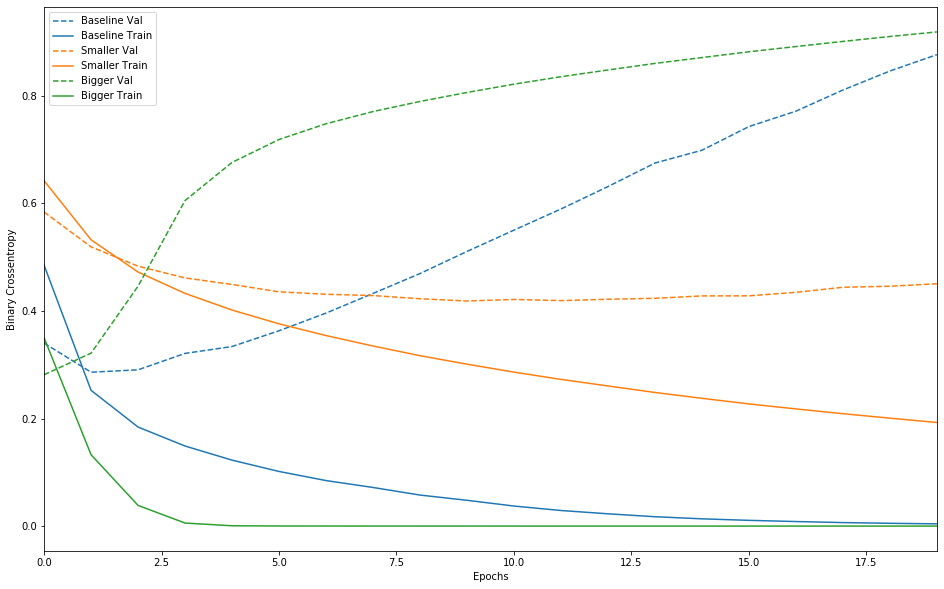

In [70]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline',baseline_history),
            ('smaller',smaller_history),
            ('bigger',bigger_history)])

In [72]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5275 - acc: 0.8022 - binary_crossentropy: 0.4876 - val_loss: 0.3821 - val_acc: 0.8766 - val_binary_crossentropy: 0.3403
Epoch 2/20
25000/25000 - 2s - loss: 0.3040 - acc: 0.9089 - binary_crossentropy: 0.2578 - val_loss: 0.3331 - val_acc: 0.8889 - val_binary_crossentropy: 0.2838
Epoch 3/20
25000/25000 - 2s - loss: 0.2526 - acc: 0.9291 - binary_crossentropy: 0.2011 - val_loss: 0.3374 - val_acc: 0.8866 - val_binary_crossentropy: 0.2842
Epoch 4/20
25000/25000 - 2s - loss: 0.2284 - acc: 0.9412 - binary_crossentropy: 0.1734 - val_loss: 0.3501 - val_acc: 0.8823 - val_binary_crossentropy: 0.2941
Epoch 5/20
25000/25000 - 2s - loss: 0.2157 - acc: 0.9434 - binary_crossentropy: 0.1584 - val_loss: 0.3663 - val_acc: 0.8783 - val_binary_crossentropy: 0.3080
Epoch 6/20
25000/25000 - 2s - loss: 0.2037 - acc: 0.9507 - binary_crossentropy: 0.1446 - val_loss: 0.3787 - val_acc: 0.8755 - val_binary_crossentropy: 0.3191
Ep

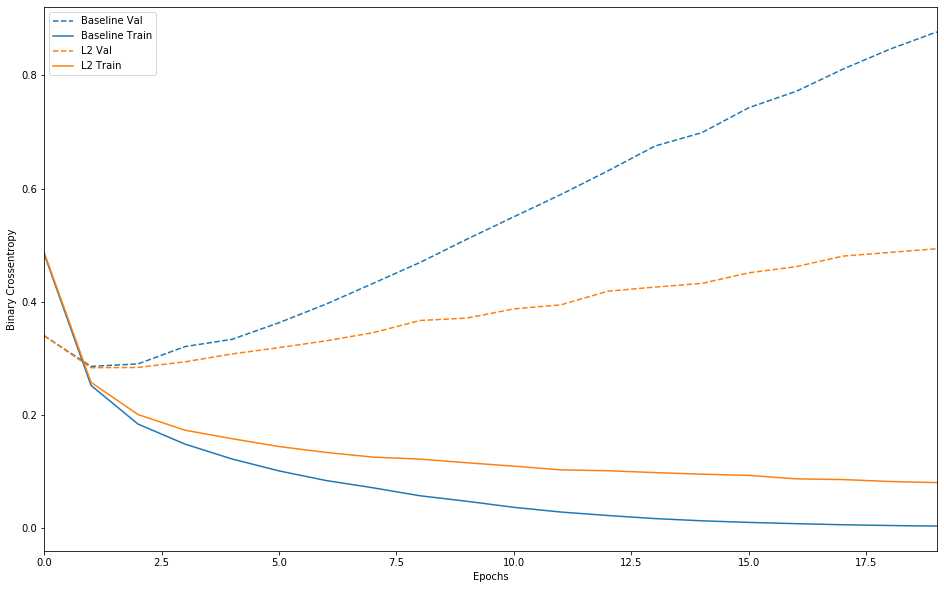

In [73]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [76]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6312 - acc: 0.6455 - binary_crossentropy: 0.6312 - val_loss: 0.5357 - val_acc: 0.8505 - val_binary_crossentropy: 0.5357
Epoch 2/20
25000/25000 - 2s - loss: 0.4876 - acc: 0.7988 - binary_crossentropy: 0.4876 - val_loss: 0.3977 - val_acc: 0.8796 - val_binary_crossentropy: 0.3977
Epoch 3/20
25000/25000 - 2s - loss: 0.3918 - acc: 0.8517 - binary_crossentropy: 0.3918 - val_loss: 0.3186 - val_acc: 0.8833 - val_binary_crossentropy: 0.3186
Epoch 4/20
25000/25000 - 2s - loss: 0.3218 - acc: 0.8864 - binary_crossentropy: 0.3218 - val_loss: 0.2868 - val_acc: 0.8896 - val_binary_crossentropy: 0.2868
Epoch 5/20
25000/25000 - 2s - loss: 0.2763 - acc: 0.9080 - binary_crossentropy: 0.2763 - val_loss: 0.2789 - val_acc: 0.8878 - val_binary_crossentropy: 0.2789
Epoch 6/20
25000/25000 - 2s - loss: 0.2379 - acc: 0.9230 - binary_crossentropy: 0.2379 - val_loss: 0.2837 - val_acc: 0.8867 - val_binary_crossentropy: 0.2837
Ep

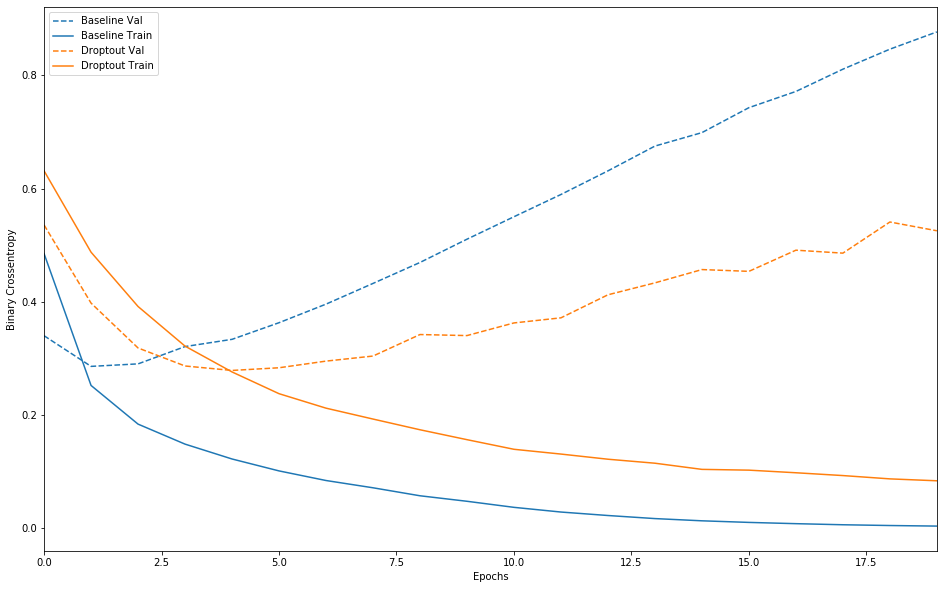

In [78]:

plot_history([('baseline', baseline_history),
             ('droptout', dpt_model_history)])